In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib     
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [15]:
def to_array(string):
    return np.array([float(el) for el in string.replace("[", "").replace("]","").split(" ")])
def WL_per_issue(payoffs):
    return (payoffs < 0) * 1

In [16]:
def load_csv_to_dataframe(csv_path):
    df = pd.read_csv(csv_path)

    cols_to_drop = ['vote-portion-strategic', 'proportion-of-strategic-voters', 'minority-power',
                   'y-axis', 'x-axis', 'issue-num', 'poll-response-rate', '[step]']
    df.drop(columns=cols_to_drop, inplace=True)

    df['total-payoff-per-issue'] = df['total-payoff-per-issue'].apply(to_array)


    df['WL-per-issue'] = df['total-payoff-per-issue'].apply(WL_per_issue)
    df['mean-WL'] = df['WL-per-issue'].apply(np.mean)
    return df

In [17]:
def plot_WL_vs_n_issues(ladf, 
                        title, 
                        hue='number-of-voters', 
                        ylim=(0, 0.25), 
                        WL_col = "mean-WL"):
    
    ax2 = sns.scatterplot(x="number-of-issues", 
                     y=WL_col,
                     hue=hue,
                     data = ladf,)

    ax2.set(ylim=ylim,
           xlabel = "number-of-issues")

    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

def plot_WL_vs_n_voters(ladf, title, 
                        hue='number-of-issues', 
                        ylim = (0, 0.25),
                        WL_col="mean-WL"):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x="number-of-voters", 
                    y=WL_col,
                    data = ladf,
                    hue=hue,
                    ax=ax1)

    sns.scatterplot(x="number-of-voters", 
                    y=WL_col,
                    data = ladf,
                    hue=hue,
                    ax=ax2)
    
    ax1.legend_.remove()
    ax2.set(xscale="log", xlabel = "number-of-voters (log scale)")
    ax1.set(ylim=ylim, xlim=(0, 10100))
    ax2.set(ylim=ylim)
    f.suptitle(title)
    
    
    plt.show()

In [20]:
df = load_csv_to_dataframe('multi-QV-with-Polling perceived-utility-varying-stdev-table.csv')
display(df)


,[run number],number-of-voters,perceived-utility-stdev,QV?,voter-num,number-of-issues,utility-distribution,total-payoff-per-issue,WL-per-issue,mean-WL
0,6,1001,0.0,True,337,10,Normal mean = 0,"[9.052774085895285, 1.3005981491567686, 1.2762...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0
1,3,1001,0.0,True,337,10,Normal mean = 0,"[11.58753820432797, 1.5932072273229814, 0.3791...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",0.1
2,4,1001,0.0,True,337,10,Normal mean = 0,"[2.6765244178631242, 1.375045522518795, 0.4294...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",0.1
3,8,1001,0.0,True,337,10,Normal mean = 0,"[10.534952088954393, 8.289143421613733, 5.6349...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]",0.2
4,2,1001,0.0,True,337,10,Normal mean = 0,"[6.940998173922408, 2.898190671785445, 10.6789...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",0.1
...,...,...,...,...,...,...,...,...,...,...
1095,1096,1001,0.1,True,337,10,Normal mean = 0,"[2.9014666008640306, 11.517045309959975, 4.263...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0
1096,1097,1001,0.1,True,337,10,Normal mean = 0,"[8.350303207725498, -1.5422300287899005, 12.72...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.1
1097,1098,1001,0.1,True,337,10,Normal mean = 0,"[1.513444709281878, 15.552443669308254, 6.2567...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0
1098,1100,1001,0.1,True,337,10,Normal mean = 0,"[4.292789098321981, 0.6332208158219008, 0.3743...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0


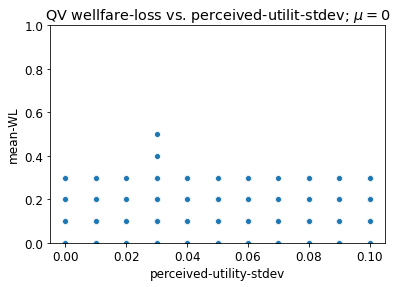

In [27]:
ax = sns.scatterplot(x="perceived-utility-stdev", 
                     y="mean-WL", 
                     data = adf)
ax.set(ylim= (0, 1),
       xlabel = "perceived-utility-stdev")
plt.title("QV wellfare-loss vs. perceived-utilit-stdev; $\mu=0$")
plt.show()